In [23]:
import glob
import cv2
#Importing Data 

train1all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/all/*.bmp")]
train1hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/hem/*.bmp")]
train2all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/all/*.bmp")]
train2hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/hem/*.bmp")]
train3all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/all/*.bmp")]
train3hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/hem/*.bmp")]

In [24]:
import numpy as np

trainall = train1all +train2all +train3all
trainhem = train1hem +train2hem +train3hem
y_train = [1]*len(trainall) + [0]*len(trainhem) #Setting 1s to Leukemia Immature Cell and 0s to Normal Cell
x_train = trainall+trainhem
y_train = np.array(y_train)
x_train = np.array(x_train)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


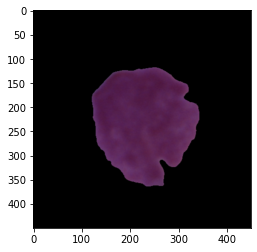

In [2]:
#Reviewing and Resizing Images To Be Smaller
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(image)
image = train1all[0]
plt.show()


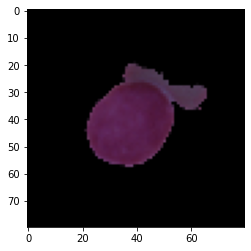

In [25]:
#Resizing Images to be Smaller
image = train1all[0]
resized_image = cv2.resize(image, dsize=(80,80), interpolation=cv2.INTER_CUBIC)
x_Strain = [resized_image]*len(x_train)

for n in range(len(x_train)):
    x_Strain[n] =  cv2.resize(x_train[n], dsize=(80,80), interpolation=cv2.INTER_CUBIC)
imgplot = plt.imshow(x_Strain[2003])


In [30]:
#Normalizing RBG Values
x_Strain = np.array(x_Strain)
x_Ntrain = x_Strain.astype("float32") / 255

print("x_Ntrain shape:", x_Ntrain.shape)
print(x_Ntrain.shape[0], "train samples")

In [37]:
#Building the Model
import numpy as np
from keras.layers import Activation, Dense
from keras.models import Sequential 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_Strain[1].shape #80, 80, 3

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1036850   
_________________________________________________________________
activation_2 (Activation)    (None, 50)               

In [38]:
batch_size = 150
epochs = 30

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_Atrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
64/64 [==============================] - 13s 195ms/step - loss: 0.4016 - accuracy: 0.8372 - val_loss: 1.0435 - val_accuracy: 0.5023
Epoch 2/30
64/64 [==============================] - 12s 193ms/step - loss: 0.3727 - accuracy: 0.8490 - val_loss: 1.2929 - val_accuracy: 0.3796
Epoch 3/30
64/64 [==============================] - 13s 200ms/step - loss: 0.3568 - accuracy: 0.8558 - val_loss: 1.2458 - val_accuracy: 0.3955
Epoch 4/30
64/64 [==============================] - 13s 202ms/step - loss: 0.3387 - accuracy: 0.8659 - val_loss: 1.3324 - val_accuracy: 0.4639
Epoch 5/30
64/64 [==============================] - 14s 214ms/step - loss: 0.3213 - accuracy: 0.8722 - val_loss: 0.8348 - val_accuracy: 0.5698
Epoch 6/30
64/64 [==============================] - 14s 214ms/step - loss: 0.3009 - accuracy: 0.8814 - val_loss: 1.2371 - val_accuracy: 0.4620
Epoch 7/30
64/64 [==============================] - 14s 212ms/step - loss: 0.2828 - accuracy: 0.8902 - val_loss: 1.2273 - val_accuracy: 0.5080